<center><h1>Luo_Xiao_HW7</h1></center>

Name: Xiao Luo
<br>
Github Username: xluo23
<br>
USC ID: 2392693288
<br>
Late Days Used for HW7：3

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### (a) Download the Anuran Calls (MFCCs) Data Set

In [3]:
df = pd.read_csv('Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
# display(df)
train_set, test_set = train_test_split(df, test_size=0.3)

y1_train = train_set['Family'] # Label 1
y2_train = train_set['Genus'] # Label 2
y3_train = train_set['Species'] # Label 3
X_train = train_set.iloc[:,0:22] 
# display(family_train)

y1_test = test_set['Family'] # Label 1
y2_test = test_set['Genus'] # Label 2
y3_test = test_set['Species'] # Label 3
X_test = test_set.iloc[:,0:22] 
# display(X_test)

### (b) Train a classifier for each label

#### (i) Research

* Exact match is a measure of accuracy that considers a prediction to be correct only if all the predicted labels match the true labels for a given instance. The exact match score is the percentage of instances for which all predicted labels match the true labels. This measure penalizes any incorrect label prediction and is particularly strict when the number of labels per instance is large.

* Hamming score and loss are measures that consider partial matches between predicted and true labels. The Hamming score is the percentage of correctly predicted labels over the total number of labels, while the Hamming loss is the percentage of incorrectly predicted labels over the total number of labels. The Hamming loss penalizes any incorrect label prediction and is particularly sensitive to the number of labels per instance.

#### (ii) Train a SVM for each of the labels

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, hamming_loss

C = np.logspace(-3, 6, 10)  # give a range for the penalty parameter
gamma = np.arange(0.1, 5.1, 0.1)  # # give a range for the Gaussian Kernel parameter
# x = np.linspace(0.1,2,20)
svc = SVC(kernel='rbf')
clf = GridSearchCV(estimator=svc, param_grid=dict(gamma=gamma, C=C), n_jobs=-1,cv=10)
clf.fit(X_train, y1_train)
family_c = clf.best_estimator_.C 
family_g = clf.best_estimator_.gamma
family_cv_score = clf.best_score_
print("The optimal penalty parameter is", family_c, "and the optimal Gaussian Kernel parameter is", family_g, "for Label 'Family'.")

The optimal penalty parameter is 100.0 and the optimal Gaussian Kernel parameter is 1.8000000000000003 for Lable 'Family'.


In [43]:
svc = SVC(kernel='rbf', C=family_c, gamma=family_g)
svc.fit(X_train, y1_train)
y1_pred = svc.predict(X_test)
y1_em = accuracy_score(y1_test, y1_pred)
y1_hl = hamming_loss(y1_test, y1_pred)
print("Exact Match Score for classification with label 'Family':", y1_em)
print("Hamming Loss for classification with label 'Family':", y1_hl) 

Exact Match Score for classification with label 'Family': 0.9939786938397406
Hamming Loss for classification with label 'Family': 0.006021306160259379


In [44]:
svc = SVC(kernel='rbf')
clf = GridSearchCV(estimator=svc, param_grid=dict(gamma=gamma, C=C), n_jobs=-1,cv=10)
clf.fit(X_train, y2_train)
genus_c = clf.best_estimator_.C 
genus_g = clf.best_estimator_.gamma
genus_cv_score = clf.best_score_
print("The optimal penalty parameter is", genus_c, "and the optimal Gaussian Kernel parameter is", genus_g, "for Label 'Genus'.")

svc = SVC(kernel='rbf', C=genus_c, gamma=genus_g)
svc.fit(X_train, y2_train)
y2_pred = svc.predict(X_test)
y2_em = accuracy_score(y2_test, y2_pred)
y2_hl = hamming_loss(y2_test, y2_pred)
print("Exact Match Score for classification with label 'Genus':", y2_em)
print("Hamming Loss for classification with label 'Genus':", y2_hl) 

The optimal penalty parameter is 10.0 and the optimal Gaussian Kernel parameter is 1.7000000000000002 for Lable 'Genus'.
Exact Match Score for classification with label 'Genus': 0.9935155164427976
Hamming Loss for classification with label 'Genus': 0.006484483557202408


In [46]:
svc = SVC(kernel='rbf')
clf = GridSearchCV(estimator=svc, param_grid=dict(gamma=gamma, C=C), n_jobs=-1,cv=10)
clf.fit(X_train, y3_train)
species_c = clf.best_estimator_.C 
species_g = clf.best_estimator_.gamma
species_cv_score = clf.best_score_
print("The optimal penalty parameter is", species_c, "and the optimal Gaussian Kernel parameter is", species_g, "for Label 'Species'.")

svc = SVC(kernel='rbf', C=species_c, gamma=species_g)
svc.fit(X_train, y3_train)
y3_pred = svc.predict(X_test)
y3_em = accuracy_score(y3_test, y3_pred)
y3_hl = hamming_loss(y3_test, y3_pred)
print("Exact Match Score for classification with label 'Species':", y3_em)
print("Hamming Loss for classification with label 'Species':", y3_hl) 

The optimal penalty parameter is 10.0 and the optimal Gaussian Kernel parameter is 2.2 for Label 'Species'.
Exact Match Score for classification with label 'Species': 0.9916628068550255
Hamming Loss for classification with label 'Species': 0.008337193144974525


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

C = np.logspace(-3, 6, 10) 
lsvc = LinearSVC(penalty='l1', dual=False, max_iter=500000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_std, y1_train)
family_c_l1 = clf.best_estimator_.C 
family_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", family_c_l1, "for Label 'Family' with L1-penalized SVM.")

lsvc = LinearSVC(penalty='l1', dual=False, C=family_c_l1)
lsvc.fit(X_train_std, y1_train)
y1_pred = lsvc.predict(X_test_std)
y1_em = accuracy_score(y1_test, y1_pred)
y1_hl = hamming_loss(y1_test, y1_pred)
print("Exact Match Score for Label 'Family' with L1-penalized SVM:", y1_em)
print("Hamming Loss for for Label 'Family' with L1-penalized SVM:", y1_hl) 

# import warnings
# warnings.filterwarnings('ignore')

The optimal l1 penalty parameter is 10.0 for Label 'Family' with L1-penalized SVM.
Exact Match Score for Label 'Family' with L1-penalized SVM: 0.9393237610004632
Hamming Loss for for Label 'Family' with L1-penalized SVM: 0.06067623899953682


In [65]:
lsvc = LinearSVC(penalty='l1', dual=False, max_iter=50000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_std, y2_train)
Genus_c_l1 = clf.best_estimator_.C 
Genus_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", Genus_c_l1, "for Label 'Genus' with L1-penalized SVM.")

lsvc = LinearSVC(penalty='l1', dual=False, C=Genus_c_l1)
lsvc.fit(X_train_std, y2_train)
y2_pred = lsvc.predict(X_test_std)
y2_em = accuracy_score(y2_test, y2_pred)
y2_hl = hamming_loss(y2_test, y2_pred)
print("Exact Match Score for Label 'Genus' with L1-penalized SVM:", y2_em)
print("Hamming Loss for for Label 'Genus' with L1-penalized SVM:", y2_hl) 

The optimal l1 penalty parameter is 1000.0 for Label 'Genus' with L1-penalized SVM.
Exact Match Score for Label 'Genus' with L1-penalized SVM: 0.952292728114868
Hamming Loss for for Label 'Genus' with L1-penalized SVM: 0.047707271885132005


In [69]:
lsvc = LinearSVC(penalty='l1', dual=False, max_iter=50000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_std, y3_train)
Species_c_l1 = clf.best_estimator_.C 
Species_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", Species_c_l1, "for Label 'Species' with L1-penalized SVM.")

lsvc = LinearSVC(penalty='l1', dual=False, C=Species_c_l1)
lsvc.fit(X_train_std, y3_train)
y3_pred = lsvc.predict(X_test_std)
y3_em = accuracy_score(y3_test, y3_pred)
y3_hl = hamming_loss(y3_test, y3_pred)
print("Exact Match Score for Label 'Species' with L1-penalized SVM:", y3_em)
print("Hamming Loss for for Label 'Species' with L1-penalized SVM:", y3_hl) 

The optimal l1 penalty parameter is 1.0 for Label 'Species' with L1-penalized SVM.
Exact Match Score for Label 'Species' with L1-penalized SVM: 0.9569245020842982
Hamming Loss for for Label 'Species' with L1-penalized SVM: 0.04307549791570171


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y1_train_sm = sm.fit_resample(X_train_std, y1_train)

C = np.logspace(-3, 6, 10) 
lsvc = LinearSVC(penalty='l1', dual=False, max_iter=500000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_sm, y1_train_sm)
family_c_l1 = clf.best_estimator_.C 
family_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", family_c_l1, "for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance.")

lsvc = LinearSVC(penalty='l1', dual=False, C=family_c_l1)
lsvc.fit(X_train_sm, y1_train_sm)
y1_pred = lsvc.predict(X_test_std)
y1_em = accuracy_score(y1_test, y1_pred)
y1_hl = hamming_loss(y1_test, y1_pred)
print("Exact Match Score for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y1_em)
print("Hamming Loss for for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y1_hl) 

The optimal l1 penalty parameter is 10000.0 for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance.
Exact Match Score for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.9286706808707735
Hamming Loss for for Label 'Family' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.07132931912922649


In [78]:
X_train_sm, y2_train_sm = sm.fit_resample(X_train_std, y2_train)

lsvc = LinearSVC(penalty='l1', dual=False, max_iter=50000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_sm, y2_train_sm)
Genus_c_l1 = clf.best_estimator_.C 
Genus_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", Genus_c_l1, "for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance.")

lsvc = LinearSVC(penalty='l1', dual=False, C=Genus_c_l1)
lsvc.fit(X_train_sm, y2_train_sm)
y2_pred = lsvc.predict(X_test_std)
y2_em = accuracy_score(y2_test, y2_pred)
y2_hl = hamming_loss(y2_test, y2_pred)
print("Exact Match Score for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y2_em)
print("Hamming Loss for for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y2_hl) 

The optimal l1 penalty parameter is 10.0 for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance.
Exact Match Score for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.9407132931912923
Hamming Loss for for Label 'Genus' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.059286706808707734


In [79]:
X_train_sm, y3_train_sm = sm.fit_resample(X_train_std, y3_train)

lsvc = LinearSVC(penalty='l1', dual=False, max_iter=50000)
clf = GridSearchCV(estimator=lsvc, param_grid=dict(C=C), n_jobs=-1, cv=10)
clf.fit(X_train_sm, y3_train_sm)
Species_c_l1 = clf.best_estimator_.C 
Species_cv_score_l1 = clf.best_score_
print("The optimal l1 penalty parameter is", Species_c_l1, "for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance.")

lsvc = LinearSVC(penalty='l1', dual=False, C=Species_c_l1)
lsvc.fit(X_train_sm, y3_train_sm)
y3_pred = lsvc.predict(X_test_std)
y3_em = accuracy_score(y3_test, y3_pred)
y3_hl = hamming_loss(y3_test, y3_pred)
print("Exact Match Score for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y3_em)
print("Hamming Loss for for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance:", y3_hl) 

The optimal l1 penalty parameter is 100.0 for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance.
Exact Match Score for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.9476609541454377
Hamming Loss for for Label 'Species' with L1-penalized SVM after using SMOTE to remedy class imbalance: 0.0523390458545623


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df.iloc[:,0:22] 
best_k = 0
highest_score = 0

for k in range(2, 51):  # silhouette_score requires more than 1 cluster labels
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    clusters = kmeans.predict(X)
    ss = silhouette_score(X, clusters)
    if ss == 0 or ss > highest_score:
        highest_score = ss
        best_k = k

print(f"The optimal k is {best_k}, with the highest silhouette score {highest_score}")


The optimal k is 4, with the highest silhouette score 0.3788646212055977


In [196]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = kmeans.predict(X)
# print(clusters)
cluster_labels = kmeans.labels_
label_df = pd.DataFrame(cluster_labels)
label_df.value_counts()

# classes = ['Family','Genus','Species']
# y = df.iloc[:,22:25] 
# print(y)

0    3568
3    1982
1    1035
2     610
dtype: int64

### (b) Determine which family is the majority

In [186]:
y1 = df.iloc[:,22]
# print(y1.value_counts())
for i in range(4):
    cluster_labels = y1[kmeans.labels_ == i]
    label_df = pd.DataFrame(cluster_labels)
    majority_label = label_df.value_counts().index.tolist()[0]
    print(f"In cluster {i}: {majority_label[0]} is the majority in the family label.")

In cluster 0: Leptodactylidae is the majority in the family label.
In cluster 1: Dendrobatidae is the majority in the family label.
In cluster 2: Hylidae is the majority in the family label.
In cluster 3: Hylidae is the majority in the family label.


In [156]:
y2 = df.iloc[:,23]
# print(y2.value_counts())
for i in range(4):
    cluster_labels = y2[kmeans.labels_ == i]
    label_df = pd.DataFrame(cluster_labels)
    majority_label = label_df.value_counts().index.tolist()[0]
    print(f"In cluster {i}: {majority_label[0]} is the majority in the genus label.")

In cluster 0: Adenomera is the majority in the genus label.
In cluster 1: Ameerega is the majority in the genus label.
In cluster 2: Hypsiboas is the majority in the genus label.
In cluster 3: Hypsiboas is the majority in the genus label.


In [195]:
y3 = df.iloc[:,24]
# print(y3.value_counts())
for i in range(4):
    cluster_labels = y3[kmeans.labels_ == i]
    label_df = pd.DataFrame(cluster_labels)
    majority_label = label_df.value_counts().index.tolist()[0]
    print(f"In cluster {i}: {majority_label[0]} is the majority in the species label.")

In cluster 0: AdenomeraHylaedactylus is the majority in the species label.
In cluster 1: Ameeregatrivittata is the majority in the species label.
In cluster 2: HypsiboasCinerascens is the majority in the species label.
In cluster 3: HypsiboasCordobae is the majority in the species label.


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [167]:
from scipy.spatial.distance import hamming

ml_c0 = ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus']
ml_c1 = ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata']
ml_c2 = ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens']
ml_c3 = ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = kmeans.predict(X)
df['cluster'] = clusters

hd_total = 0 
hl_total = 0 
hs_total = 0
for i in df.index:
    true_lable = [df['Family'][i], df['Genus'][i], df['Species'][i]]
    # print(true_lable)
    if df['cluster'][i] == 0:
        hd = hamming(true_lable, ml_c0) * len(ml_c0)
        hl = hamming_loss(true_lable, ml_c0)
    if df['cluster'][i] == 1:
        hd = hamming(true_lable, ml_c1) * len(ml_c1)
        hl = hamming_loss(true_lable, ml_c1)
    if df['cluster'][i] == 2:
        hd = hamming(true_lable, ml_c2) * len(ml_c2)
        hl = hamming_loss(true_lable, ml_c2)
    if df['cluster'][i] == 3:
        hd = hamming(true_lable, ml_c3) * len(ml_c3)
        hl = hamming_loss(true_lable, ml_c3)
    hs = 1 - hl

    hd_total += hd
    hl_total += hl
    hs_total += hs
    
hd_avg = hd_total/len(df)
hl_avg = hl_total/len(df)
hs_avg = hs_total/len(df)
print("The average Hamming distance:", hd_avg)
print("The average Hamming loss:", hl_avg)
print("The average Hamming score:", hs_avg)


The average Hamming distance: 0.6653231410701876
The average Hamming loss: 0.2217743803567304
The average Hamming score: 0.778225619643266


In [214]:
# Monte-Carlo Simulation: Perform the following procedures 50 times, report the average and standard deviation of the 50 Hamming Distances

HDs = []
for iteration in range(1,51):
    print(f"---------------------------------------- Iteration {iteration} ----------------------------------------")
    for k in range(2, 51):  
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        clusters = kmeans.predict(X)
        ss = silhouette_score(X, clusters)
        if ss == 0 or ss > highest_score:
            highest_score = ss
            best_k = k
    print(f"In iteration {iteration}: the optimal k is {best_k}, with the highest silhouette score {highest_score}")
    
    kmeans = KMeans(n_clusters=best_k, random_state=0).fit(X)
    clusters = kmeans.predict(X)
    df['cluster'] = clusters
    hd_total = 0 
    hl_total = 0 

    for clt in range(best_k): # clt = cluster
        majority_labels = []
        label_df = df[df['cluster'] == clt]
        y1_majority = label_df['Family'].mode()[0]
        majority_labels.append(y1_majority)
        y2_majority = label_df['Genus'].mode()[0]
        majority_labels.append(y2_majority)
        y3_majority = label_df['Species'].mode()[0]
        majority_labels.append(y3_majority)
        print(f"In cluster {clt}: {majority_labels} is the majority label.")

        for i in label_df.index:
            true_lable = [label_df['Family'][i], label_df['Genus'][i], label_df['Species'][i]]
            hd = hamming(true_lable, majority_labels) * len(majority_labels)
            hl = hamming_loss(true_lable, majority_labels)
            hd_total += hd
            hl_total += hl
        
    hd_avg = hd_total/len(df)
    hl_avg = hl_total/len(df)
    print(f"In iteration {iteration}: the average Hamming distance is {hd_avg}, Hamming loss is {hl_avg}, Hamming score is {1 - hl_avg}\n")

    HDs.append(hd_avg)

mean = np.mean(HDs)
std_dev = np.std(HDs)

print("Average of the 50 Hamming Distances:", mean)
print("Standard Deviation of the 50 Hamming Distances:", std_dev)

---------------------------------------- Iteration 1 ----------------------------------------
In iteration 1: the optimal k is 3, with the highest silhouette score 0.3788646212055977
In cluster 0: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'] is the majority label.
In cluster 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'] is the majority label.
In cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'] is the majority label.
In iteration 1: the average Hamming distance is 0.8904794996525365, Hamming loss is 0.29682649988417525, Hamming score is 0.7031735001158248

---------------------------------------- Iteration 2 ----------------------------------------
In iteration 2: the optimal k is 3, with the highest silhouette score 0.3788646212055977
In cluster 0: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'] is the majority label.
In cluster 1: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'] is the majority label.
In cluster 2: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaeda

## 3. ISLR 12.6.2

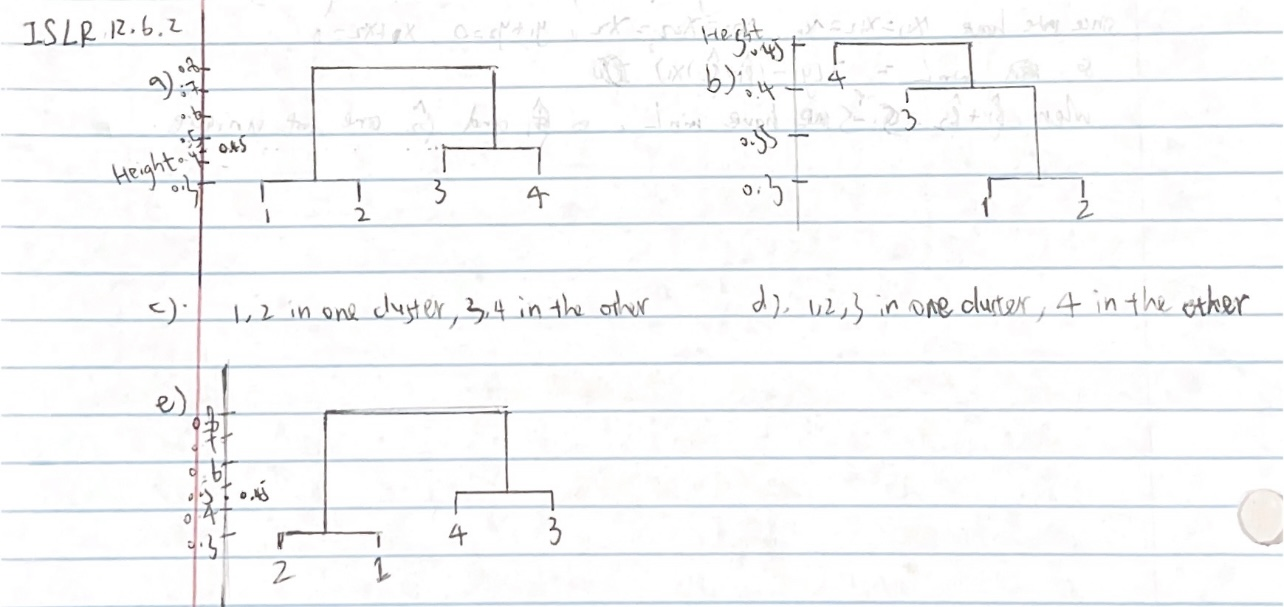

In [103]:
from IPython.display import Image
Image('1.jpg')